In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('EPL_Set.csv')
df = pd.DataFrame(df)
print(df)


FileNotFoundError: [Errno 2] No such file or directory: 'EPL_Set.csv'

In [3]:
from sklearn import svm

df.head()
col_names = df.columns
col_names

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Season'],
      dtype='object')

In [4]:
df["TAOG"] = df["FTAG"] + df["FTHG"]

print(df.head(10))

  Div      Date          HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0  14/08/93           Arsenal        Coventry     0     3   A   NaN   NaN   
1  E0  14/08/93       Aston Villa             QPR     4     1   H   NaN   NaN   
2  E0  14/08/93           Chelsea       Blackburn     1     2   A   NaN   NaN   
3  E0  14/08/93         Liverpool  Sheffield Weds     2     0   H   NaN   NaN   
4  E0  14/08/93          Man City           Leeds     1     1   D   NaN   NaN   
5  E0  14/08/93         Newcastle       Tottenham     0     1   A   NaN   NaN   
6  E0  14/08/93            Oldham         Ipswich     0     3   A   NaN   NaN   
7  E0  14/08/93  Sheffield United         Swindon     3     1   H   NaN   NaN   
8  E0  14/08/93       Southampton         Everton     0     2   A   NaN   NaN   
9  E0  14/08/93          West Ham       Wimbledon     0     2   A   NaN   NaN   

   HTR   Season  TAOG  
0  NaN  1993-94     3  
1  NaN  1993-94     5  
2  NaN  1993-94     3  
3  NaN  1993

In [5]:
df["TAOG"].value_counts()/np.float(len(df))


2     0.239756
3     0.211403
1     0.182326
4     0.149834
0     0.085058
5     0.074296
6     0.034561
7     0.014176
8     0.006105
9     0.001863
10    0.000517
11    0.000103
Name: TAOG, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
 11  TAOG      9664 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 906.1+ KB


In [7]:
new_df = df.filter(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR'
        'Season', 'TAOG'])
print(new_df)

     Div      Date     HomeTeam        AwayTeam  FTHG  FTAG  TAOG
0     E0  14/08/93      Arsenal        Coventry     0     3     3
1     E0  14/08/93  Aston Villa             QPR     4     1     5
2     E0  14/08/93      Chelsea       Blackburn     1     2     3
3     E0  14/08/93    Liverpool  Sheffield Weds     2     0     2
4     E0  14/08/93     Man City           Leeds     1     1     2
...   ..       ...          ...             ...   ...   ...   ...
9659  E0  13/05/18    Newcastle         Chelsea     3     0     3
9660  E0  13/05/18  Southampton        Man City     0     1     1
9661  E0  13/05/18      Swansea           Stoke     1     2     3
9662  E0  13/05/18    Tottenham       Leicester     5     4     9
9663  E0  13/05/18     West Ham         Everton     3     1     4

[9664 rows x 7 columns]


In [8]:
round(df.describe(), 2)

,FTHG,FTAG,HTHG,HTAG,TAOG
count,9664.00,9664.00,8740.00,8740.00,9664.00
mean,1.52,1.12,0.69,0.49,2.65
std,1.30,1.12,0.83,0.71,1.69
min,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,1.00
50%,1.00,1.00,0.00,0.00,2.00
75%,2.00,2.00,1.00,1.00,4.00
max,9.00,8.00,5.00,5.00,11.00


In [9]:
import matplotlib.pyplot as plt

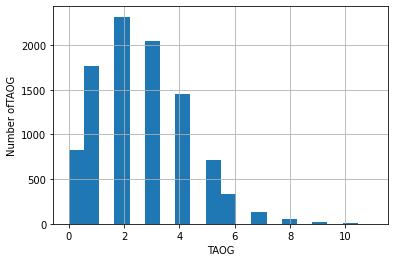

In [10]:
def subplot(name) -> None:
        plt.subplot(1, 1, 1)
        fig = df[name].hist(bins=20)
        fig.set_xlabel(name)
        fig.set_ylabel('Number of' + name)
subplot('TAOG')


In [40]:
from sklearn.linear_model import LinearRegression
import datetime

new_df = df.filter(['Date', 'FTHG', 'FTAG', 'FTR'
        'Season', 'TAOG'])

new_df['Date'] = pd.to_datetime(new_df['Date'])

new_df['Date'] = new_df['Date'].map(datetime.datetime.toordinal)


In [41]:
whole_dataset = new_df
total_goals = new_df['TAOG']


In [42]:
print(total_goals)


0       3
1       5
2       3
3       2
4       2
       ..
9659    3
9660    1
9661    3
9662    9
9663    4
Name: TAOG, Length: 9664, dtype: int64


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(whole_dataset, total_goals , test_size=0.2, random_state=0)


In [44]:
from sklearn.linear_model import LinearRegression


In [45]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)


LinearRegression()

In [46]:
y_pred = regressor.predict(X_test)

In [47]:
print(y_pred)


[4. 4. 3. ... 2. 4. 3.]


In [48]:
print(len(y_pred))


1933


In [49]:
print(len(X_test))


1933
